**Description:** The project focuses on developing and evaluating dynamic pricing models for retail. It compares traditional statistical methods like ARIMA with ensemble learning techniques, such as Random Forests. 

**Research Problem:** Traditional models often struggle with complex data patterns and large datasets. The problem is to determine whether advanced ensemble learning techniques can outperform traditional time-series models in predicting optimal prices.

### Strategies for Dynamic Pricing:
1. **Rule-Based Pricing:** Setting prices based on predefined rules like competitor prices, stock levels, or markdown schedules. Works well as a baseline for both model types.
2. **Demand Forecasting:** Predicting future demand to adjust prices dynamically, commonly used in time-series models.
3. **Elasticity-Based Pricing:** Adjusting prices based on the estimated price elasticity of demand, often implemented using ensemble models for non-linear relationships.
4. **Optimization-Based Pricing:** Using optimization algorithms to maximize revenue or profit by integrating model predictions with constraints like inventory and competitor prices.
5. **Context-Aware Pricing:** Leveraging additional factors like seasonality, promotions, or customer behavior, often better captured by ensemble models due to their feature flexibility.

### Differences in Strategies:
1. **Time-Series Models:** Focus on temporal patterns and demand forecasting, relying heavily on historical sales and seasonality trends.
2. **Ensemble Models:** Incorporate broader feature sets (e.g., competitor prices, customer ratings) and excel in capturing complex, non-linear relationships, making them suitable for context-aware and elasticity-based pricing.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset = pd.read_csv("Datasets/retail_store_inventory.csv")

In [16]:
dataset.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

### Exploratory Data Analysis

In [17]:
dataset.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [18]:
dataset.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [19]:
dataset.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

##### What is the overall distribution of prices?
(Understanding price distribution helps identify common price ranges and outliers.)

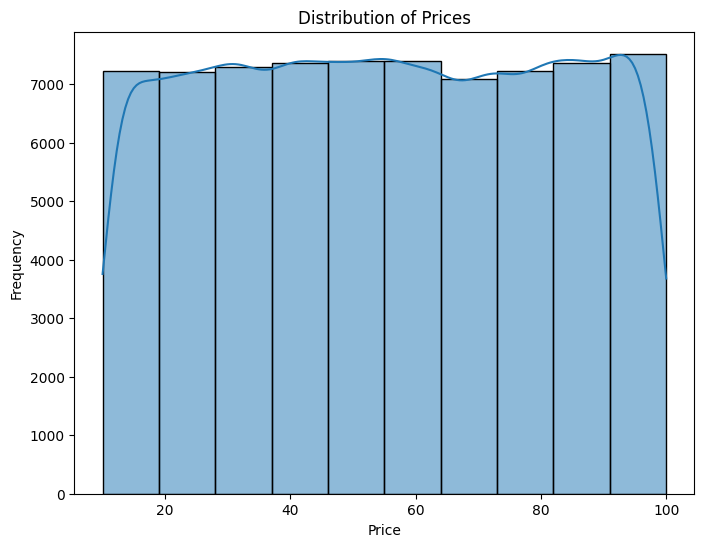

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Price'], bins=10, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

> The prices in the dataset are relatively uniformly distributed. This means there's no single price range that dominates the dataset; prices are spread out evenly across the entire range.  

(Prices are uniformly distributed, we might want to explore dynamic pricing strategies that consider contextual factors like demand, inventory levels, or competitor pricing to find opportunities for optimizing prices.)